In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('District_crimes.csv')

In [3]:
df.shape

(9017, 33)

In [4]:
pd.set_option('display.max_columns', None)
df.sample(5)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
61,ASSAM,LAKHIMPUR,2001,26,21,1,64,0,64,72,62,10,15,0,47,124,195,0,195,106,25,71,0,0,386,0,22,0,93,0,89,422,1779
8273,ASSAM,HAILAKANDI,2012,24,13,0,56,0,56,96,65,31,11,0,6,33,149,23,126,176,14,40,0,15,51,6,52,0,125,0,32,423,1322
6192,KERALA,THRISSUR,2009,23,38,24,32,0,32,19,10,9,7,26,75,211,409,169,240,699,24,392,3,37,993,3,153,29,345,0,7,6582,10131
6849,HIMACHAL PRADESH,G.R.P.,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,1,0,0,1,0,0,0,0,0,0,11,17
3326,MIZORAM,KOLASIB,2005,2,1,0,2,0,2,0,0,0,0,0,0,30,70,0,70,0,0,2,0,1,4,0,0,0,0,0,0,40,152


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [6]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [7]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [8]:
df['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'TOTAL', 'CHANGLANG', 'DIBANG VALLEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST',
       'SIANG UPPER', 'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER',
       'TAWANG', 'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA',
       'GOLAGHAT', 'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON',
       'N.C.HILLS', 'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR',
    

In [9]:
# Filter rows where the 'DISTRICT' column is 'TOTAL'
total_rows = df[df['DISTRICT'] == 'TOTAL']

# Print the filtered rows
print(total_rows)

               STATE/UT DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
28       ANDHRA PRADESH    TOTAL  2001    2602               1555   
42    ARUNACHAL PRADESH    TOTAL  2001      83                 53   
70                ASSAM    TOTAL  2001    1356                481   
115               BIHAR    TOTAL  2001    3643               3419   
135        CHHATTISGARH    TOTAL  2001     880                529   
...                 ...      ...   ...     ...                ...   
8988         CHANDIGARH    TOTAL  2012      21                 44   
8990       D & N HAVELI    TOTAL  2012       7                  2   
8993        DAMAN & DIU    TOTAL  2012       3                  5   
9013        LAKSHADWEEP    TOTAL  2012       0                  0   
9016         PUDUCHERRY    TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
28                                          136   871               0   
42                       

In [10]:
df['STATE/UT'].nunique()

35

In [11]:
df['DISTRICT'].nunique()

808

In [12]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,13.177110,7.084618,55.066430,247.829433,776.428968,281.772208,494.656759,171.881335,40.816458,170.255517,5.926140,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,56.778798,42.350314,220.576876,941.233426,2935.008640,1164.677928,1895.366707,685.061783,172.042434,743.536365,25.985903,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,1.000000,0.000000,6.000000,31.000000,88.000000,12.000000,64.000000,11.000000,4.000000,13.000000,0.000000,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,3.000000,0.000000,17.000000,83.000000,217.000000,48.000000,152.000000,46.000000,11.000000,37.000000,1.000000,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,9.000000,2.000000,37.000000,177.000000,466.000000,140.000000,313.000000,125.000000,28.000000,104.000000,4.000000,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,1319.000000,1263.000000,6949.000000,16617.000000,53449.000000,22773.000000,35960.000000,11214.000000,4296.000000,19646.000000,599.000000,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


In [13]:
total_crime_state = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum()

In [14]:
pd.DataFrame(total_crime_state.reset_index())

,STATE/UT,TOTAL IPC CRIMES
0,A & N ISLANDS,18204
1,ANDHRA PRADESH,4037962
2,ARUNACHAL PRADESH,55304
3,ASSAM,1195528
4,BIHAR,2692586
5,CHANDIGARH,81614
6,CHHATTISGARH,1122054
7,D & N HAVELI,9302
8,DAMAN & DIU,5896
9,DELHI UT,1266348


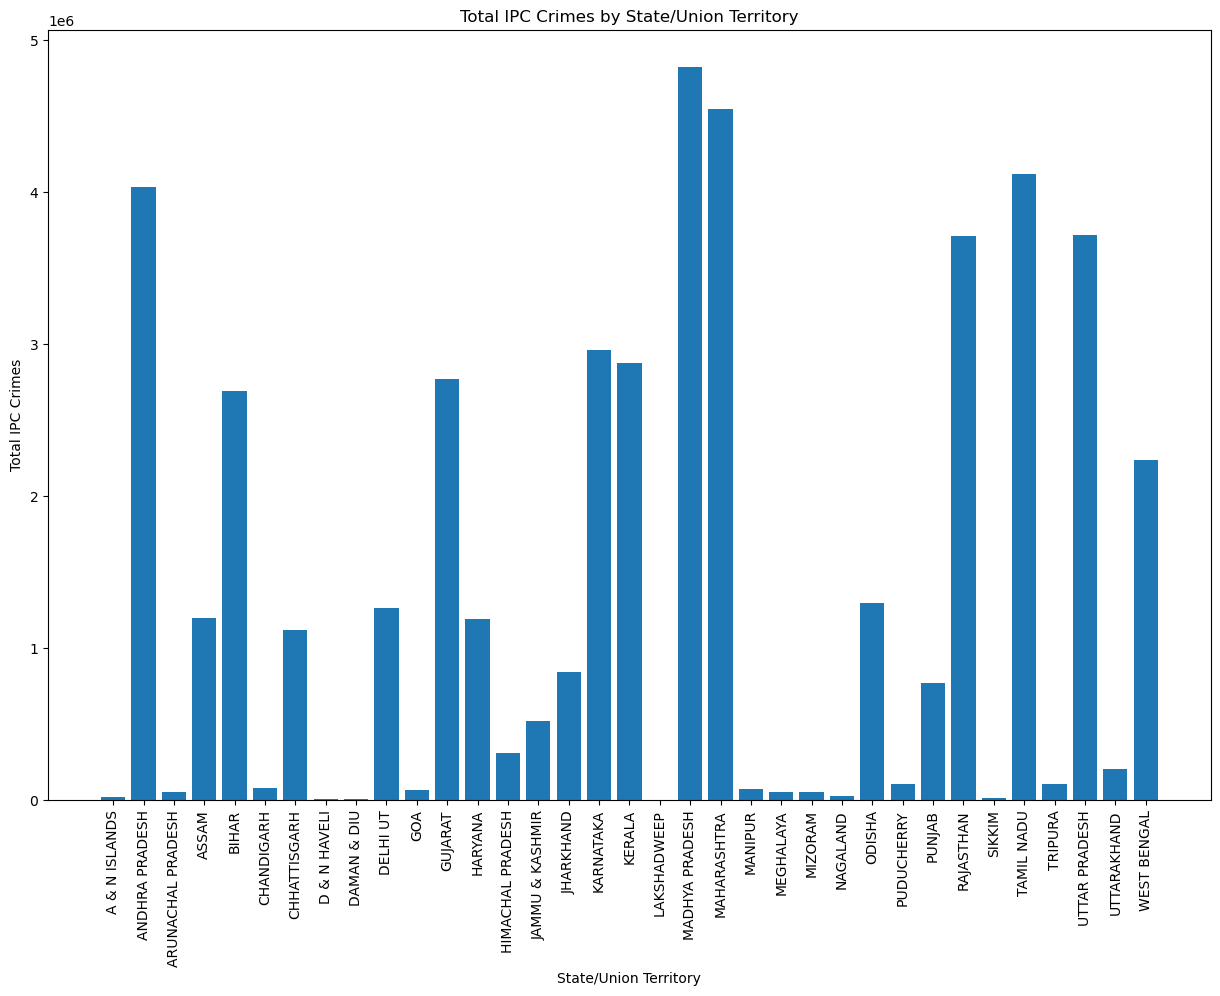

In [15]:
# Create a bar chart
plt.figure(figsize=(15, 10))
plt.bar(total_crime_state.index, total_crime_state.values)
plt.xticks(rotation=90)
plt.xlabel('State/Union Territory')
plt.ylabel('Total IPC Crimes')
plt.title('Total IPC Crimes by State/Union Territory')
plt.show()

In [16]:
cols = ['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']

In [17]:
data_selected_cols = df[cols]

In [18]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_selected_cols)

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

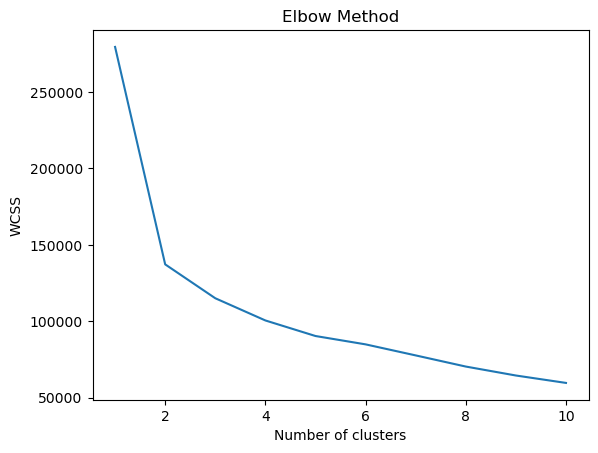

In [20]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# Apply K-means clustering with the chosen number of clusters (3 in this case)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_normalized)

In [22]:
# Add cluster labels to the original data
data_selected_cols['Cluster'] = clusters

C:\Users\akt1871\AppData\Local\Temp\ipykernel_20168\2862987938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected_cols['Cluster'] = clusters


In [23]:
# Calculate the mean values for each cluster
cluster_means = data_selected_cols.groupby('Cluster').mean()

In [24]:
print(cluster_means)

                YEAR       MURDER  ATTEMPT TO MURDER  \
Cluster                                                
0        2006.627664    49.645238          43.783447   
1        2007.169492  3112.576271        2719.000000   
2        2006.485507  1330.239130        1140.311594   

         CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  \
Cluster                                                           
0                                         5.459070    29.629252   
1                                       442.983051  1794.169492   
2                                       108.282609   804.985507   

         CUSTODIAL RAPE   OTHER RAPE  KIDNAPPING & ABDUCTION  \
Cluster                                                        
0              0.003175    29.626077               43.883333   
1              0.152542  1794.016949             2505.949153   
2              0.108696   804.876812             1295.739130   

         KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
Cluste

In [25]:
# Define cluster labels based on the mean values
labels = ['Peaceful Areas', 'Moderate Areas', 'Sensitive Areas']

In [26]:
# Sort the clusters based on their mean crime rates to assign meaningful labels
sorted_clusters = cluster_means['TOTAL IPC CRIMES'].sort_values().index
cluster_labels = {sorted_clusters[i]: labels[i] for i in range(len(labels))}

In [27]:
# Map the cluster labels to the DataFrame
data_selected_cols['Area Type'] = data_selected_cols['Cluster'].map(cluster_labels)

In [28]:
# Create DataFrames for each area type
peaceful_areas = data_selected_cols[data_selected_cols['Area Type'] == 'Peaceful Areas']
moderate_areas = data_selected_cols[data_selected_cols['Area Type'] == 'Moderate Areas']
sensitive_areas = data_selected_cols[data_selected_cols['Area Type'] == 'Sensitive Areas']

In [29]:
peaceful_areas.sample(5)

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster,Area Type
7415,2011,109,94,8,84,0,84,77,70,7,5,0,8,230,346,96,250,85,24,175,3,33,1897,20,112,142,429,0,359,881,5121,0,Peaceful Areas
3332,2005,24,24,5,37,0,37,13,0,13,3,0,6,442,777,0,777,35,11,58,5,20,77,4,49,4,0,0,4,558,2156,0,Peaceful Areas
5940,2009,23,22,0,31,0,31,58,48,10,10,0,23,75,158,46,112,8,3,27,2,10,304,6,76,0,73,0,38,401,1348,0,Peaceful Areas
8294,2012,43,0,0,11,0,11,76,69,7,2,0,8,48,126,17,109,150,43,22,0,43,43,9,0,0,37,0,23,1045,1729,0,Peaceful Areas
1738,2003,52,41,25,47,0,47,12,1,11,11,2,35,281,262,97,165,458,39,157,3,46,1143,3,140,4,214,0,4,2486,5465,0,Peaceful Areas


In [30]:
moderate_areas.shape

(138, 33)

In [31]:
sensitive_areas.shape

(59, 33)

In [32]:
peaceful_areas.shape

(8820, 33)

In [33]:
rows = data_selected_cols.iloc[[6275,6146]]

print("Extracted rows using indices 0 and 2:")
print(rows)

Extracted rows using indices 0 and 2:
      YEAR  MURDER  ATTEMPT TO MURDER  \
6275  2009      43                 13   
6146  2009      87                 80   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
6275                                          1    23               0   
6146                                          0    14               0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  \
6275          23                      13   
6146          14                      23   

      KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
6275                                           13   
6146                                            4   

      KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
6275                                   0        2   
6146                                  19       26   

      PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
6275                                     0       10        84    181   
6146                 

In [34]:
# Extract indices from peaceful_areas, moderate_areas, and sensitive_areas
peaceful_indices = peaceful_areas.index
moderate_indices = moderate_areas.index
sensitive_indices = sensitive_areas.index

In [35]:
# Validate and convert indices to a list
peaceful_indices = list(peaceful_indices)
moderate_indices = list(moderate_indices)
sensitive_indices = list(sensitive_indices)

In [36]:
df_peaceful = df.iloc[peaceful_indices]
df_moderate = df.iloc[moderate_indices]
df_sensitive = df.iloc[sensitive_indices]

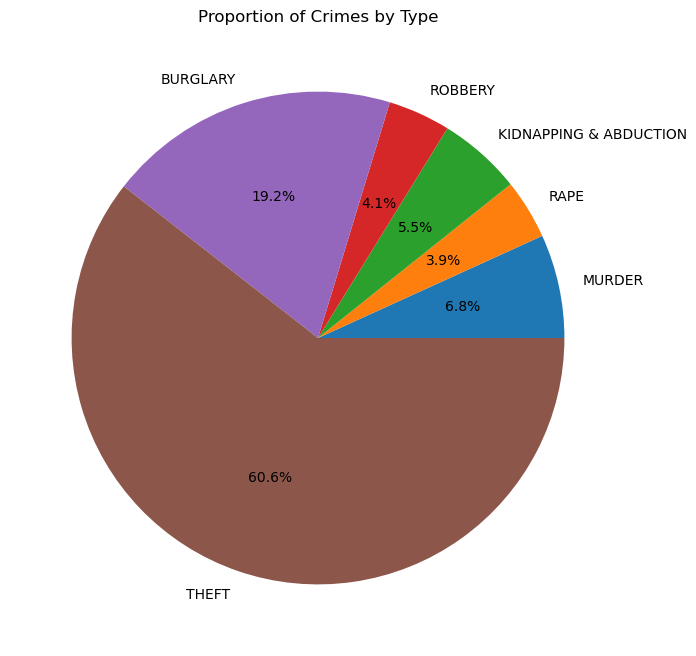

In [37]:
sensitive_total = df_sensitive[['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'ROBBERY', 'BURGLARY', 'THEFT']].sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sensitive_total.values, labels=sensitive_total.index, autopct='%1.1f%%')
plt.title('Proportion of Crimes by Type')
plt.show()

In [38]:
df_sensitive.drop(columns = ['TOTAL IPC CRIMES'], inplace = True)

C:\Users\akt1871\AppData\Local\Temp\ipykernel_20168\513163939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensitive.drop(columns = ['TOTAL IPC CRIMES'], inplace = True)


In [39]:
df_sensitive.sample()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
5040,UTTAR PRADESH,TOTAL,2007,5000,4424,1616,1648,0,1648,4478,3363,1115,437,82,2169,5057,22816,10859,11957,4495,3639,8399,337,268,10694,2076,2522,2882,7650,0,7655,51914


In [40]:
# Sum the counts of each type of crime
crime_summary = df_sensitive.sum(numeric_only=True)

print("Crime Summary in Sensitive Areas:")
print(crime_summary)

Crime Summary in Sensitive Areas:
YEAR                                                    118423
MURDER                                                  183642
ATTEMPT TO MURDER                                       160421
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                26136
RAPE                                                    105856
CUSTODIAL RAPE                                               9
OTHER RAPE                                              105847
KIDNAPPING & ABDUCTION                                  147851
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             113485
KIDNAPPING AND ABDUCTION OF OTHERS                       34366
DACOITY                                                  20207
PREPARATION AND ASSEMBLY FOR DACOITY                     10032
ROBBERY                                                 110455
BURGLARY                                                517212
THEFT                                                  1634816
AUTO THEFT           

In [41]:
df_sensitive.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES'],
      dtype='object')

In [42]:
# Sort the crime summary to see the most prevalent crimes
crime_summary_sorted = crime_summary.sort_values(ascending=False)

print("Most Prevalent Crimes in Sensitive Areas:")
print(crime_summary_sorted)

Most Prevalent Crimes in Sensitive Areas:
OTHER IPC CRIMES                                       3487915
HURT/GREVIOUS HURT                                     1658568
THEFT                                                  1634816
OTHER THEFT                                            1064343
AUTO THEFT                                              570473
BURGLARY                                                517212
CAUSING DEATH BY NEGLIGENCE                             511137
CRUELTY BY HUSBAND OR HIS RELATIVES                     446519
CHEATING                                                376466
RIOTS                                                   262963
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY     222144
MURDER                                                  183642
ATTEMPT TO MURDER                                       160421
KIDNAPPING & ABDUCTION                                  147851
YEAR                                                    118423
KIDNAPPING AN

In [43]:
# Drop non-numeric columns for correlation calculation
numeric_sensitive_areas = df_sensitive.drop(columns=['STATE/UT', 'DISTRICT'])

# Calculate the correlation matrix
correlation_matrix = numeric_sensitive_areas.corr()

In [44]:
import seaborn as sns

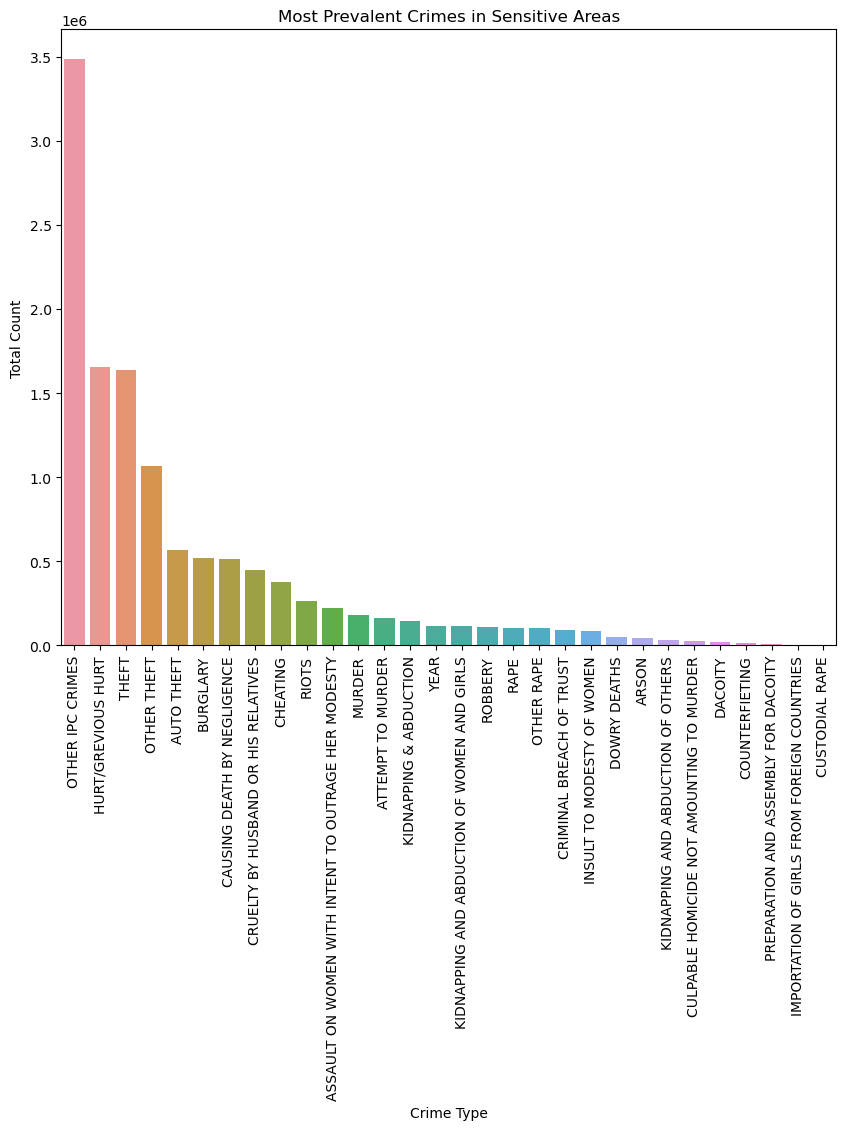

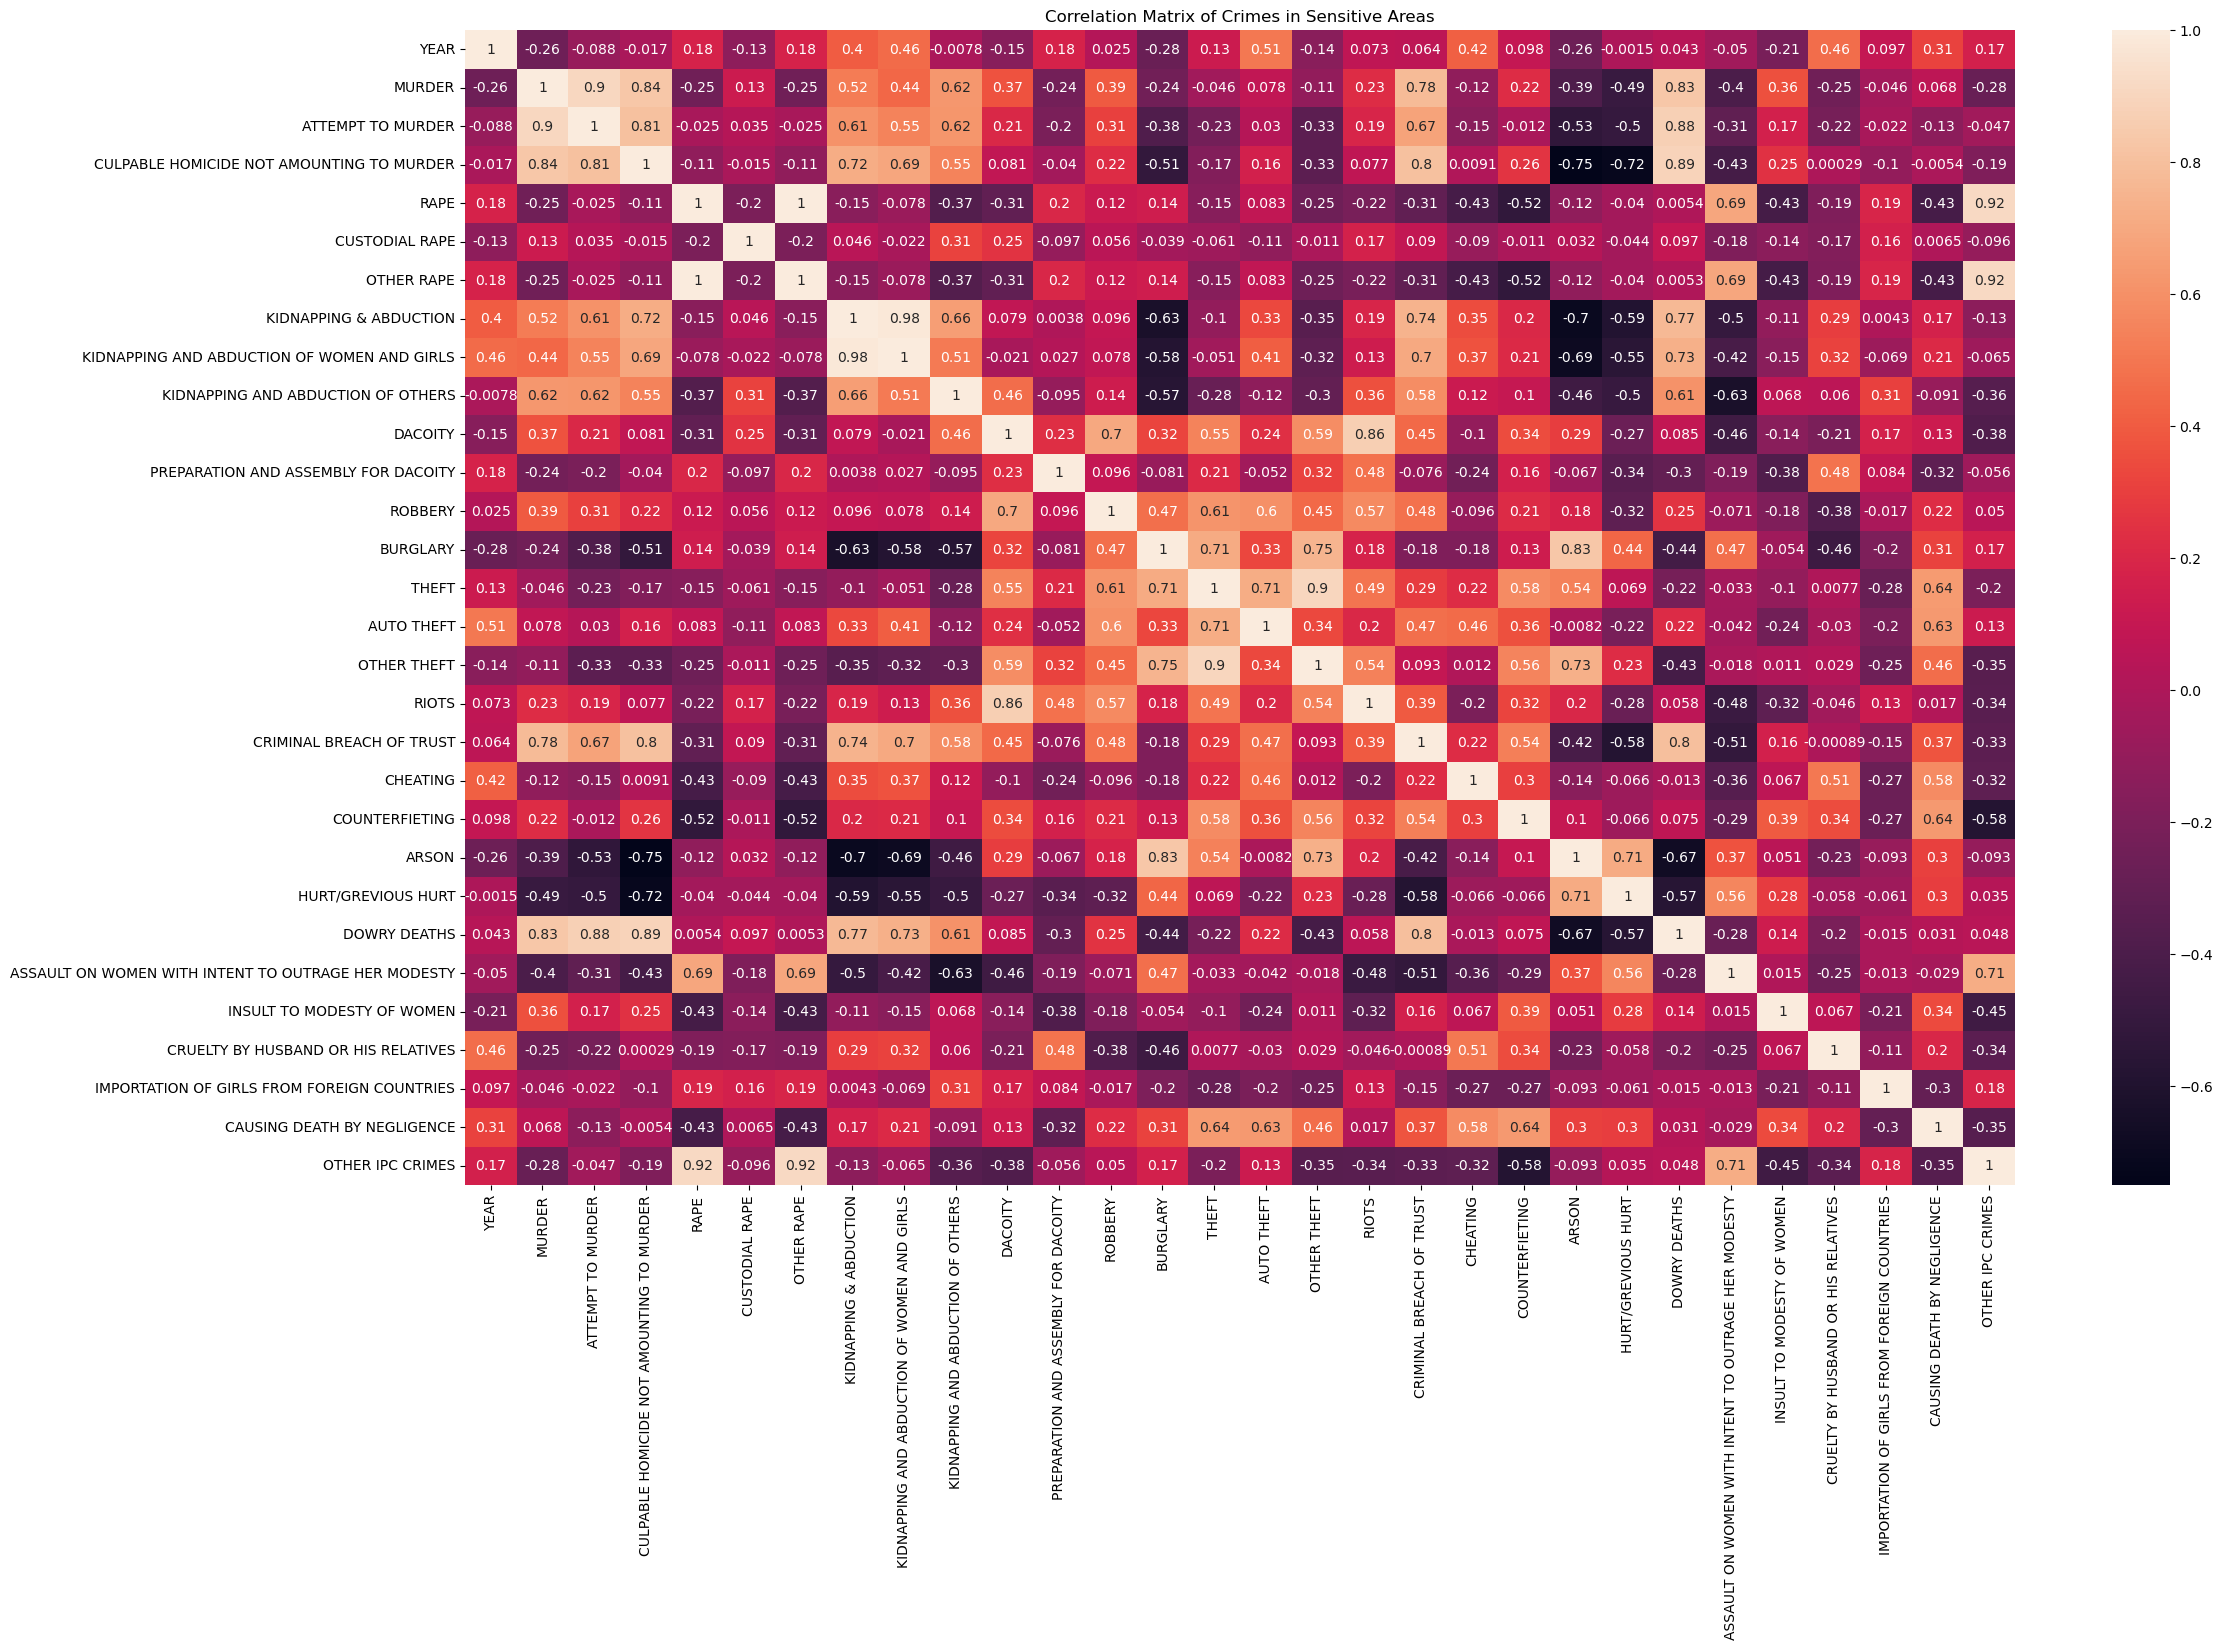

In [45]:
# Plot the most prevalent crimes
plt.figure(figsize=(10, 8))
sns.barplot(x=crime_summary_sorted.index, y=crime_summary_sorted.values)
plt.xticks(rotation=90)
plt.title("Most Prevalent Crimes in Sensitive Areas")
plt.xlabel("Crime Type")
plt.ylabel("Total Count")
plt.show()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix of Crimes in Sensitive Areas")
plt.show()

In [46]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,2,0,0,1,3,21,81,53,28,17,1,15,1,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,14,3,5,14,13,56,577,409,168,109,8,75,5,20,632,0,7,2,5,0,219,1668,3494


In [53]:
# Sum the counts of each type of crime by district
crime_by_district = df.groupby('DISTRICT').sum(numeric_only=True)

In [54]:
# Calculate the total number of crimes for each district
crime_by_district['TOTAL_CRIMES'] = crime_by_district.sum(axis=1)

In [57]:
# Sort the districts by the total number of crimes in ascending order
sorted_districts = crime_by_district['TOTAL_CRIMES'].sort_values()

# Safest district (lowest crime rate)
safest_district = sorted_districts.index[0]
safest_district_total = sorted_districts.iloc[0]

# Most unsafe district (highest crime rate)
most_unsafe_district = sorted_districts.index[-2]
most_unsafe_district_total = sorted_districts.iloc[-2]

print(f"The safest district is {safest_district} with {safest_district_total} total crimes.")
print(f"The most unsafe district is {most_unsafe_district} with {most_unsafe_district_total} total crimes.")

The safest district is RAILWAYS KATRA with 2018 total crimes.
The most unsafe district is DELHI UT TOTAL with 1553479 total crimes.
